In [64]:
# Name: Pritam shrestha
# Assignment N0: 3.3
# Professor: Fadi Alsaleem
# Reference:https://rpubs.com/shinojnair
library(car)  # Package with Special functions for linear regression
library(lattice)  # Graphics Package
library(ggplot2) # Graphical Package

In [65]:
# Create a dataframe with Dodgers Data
DodgersData <- read.csv("DodgersData.csv")

In [66]:
# Check the structure for Dorder Data
str(DodgersData)

'data.frame':	81 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ month      : Factor w/ 7 levels "APR","AUG","JUL",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day        : int  10 11 12 13 14 15 23 24 25 27 ...
 $ attend     : int  56000 29729 28328 31601 46549 38359 26376 44014 26345 44807 ...
 $ day_of_week: Factor w/ 7 levels "Friday","Monday",..: 6 7 5 1 3 4 2 6 7 1 ...
 $ opponent   : Factor w/ 17 levels "Angels","Astros",..: 13 13 13 11 11 11 3 3 3 10 ...
 $ temp       : int  67 58 57 54 57 65 60 63 64 66 ...
 $ skies      : Factor w/ 2 levels "Clear ","Cloudy": 1 2 2 2 2 1 2 2 2 1 ...
 $ day_night  : Factor w/ 2 levels "Day","Night": 1 2 2 2 2 1 2 2 2 2 ...
 $ cap        : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ shirt      : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ fireworks  : Factor w/ 2 levels "NO","YES": 1 1 1 2 1 1 1 1 1 2 ...
 $ bobblehead : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...


In [68]:
# Evaluate the factor levels for day_of_week
# levels(DodgersData$day_of_week)

# Reorder the factor levels for day_of_week
DodgersData$day_of_week <- factor(DodgersData$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

# Evaluate the factor levels for month
# levels(DodgersData$month)

# Reorder the factor levels for month
DodgersData$month <- factor(DodgersData$month, levels = c("APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT"))

In [69]:
# First 10 rows of the data frame
head(DodgersData, 10)

X,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


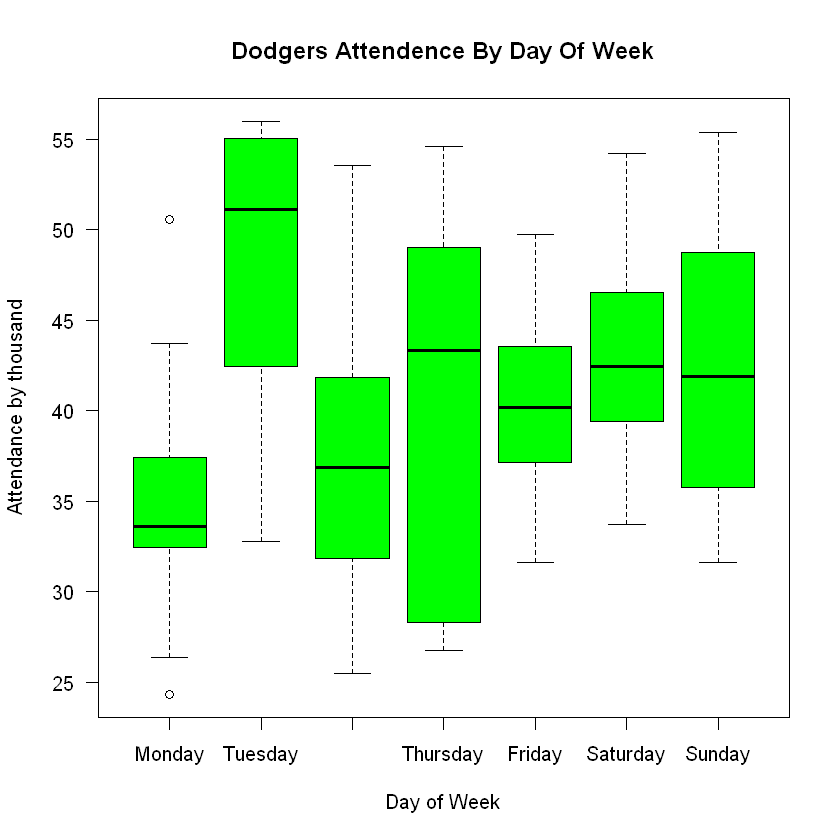

In [88]:
## Box plot to explore attendance by day of week
plot(DodgersData$day_of_week, DodgersData$attend / 1000, main = "Dodgers Attendence By Day Of Week", xlab = "Day of Week", ylab = "Attendance by thousand", col = "green", las = 1)

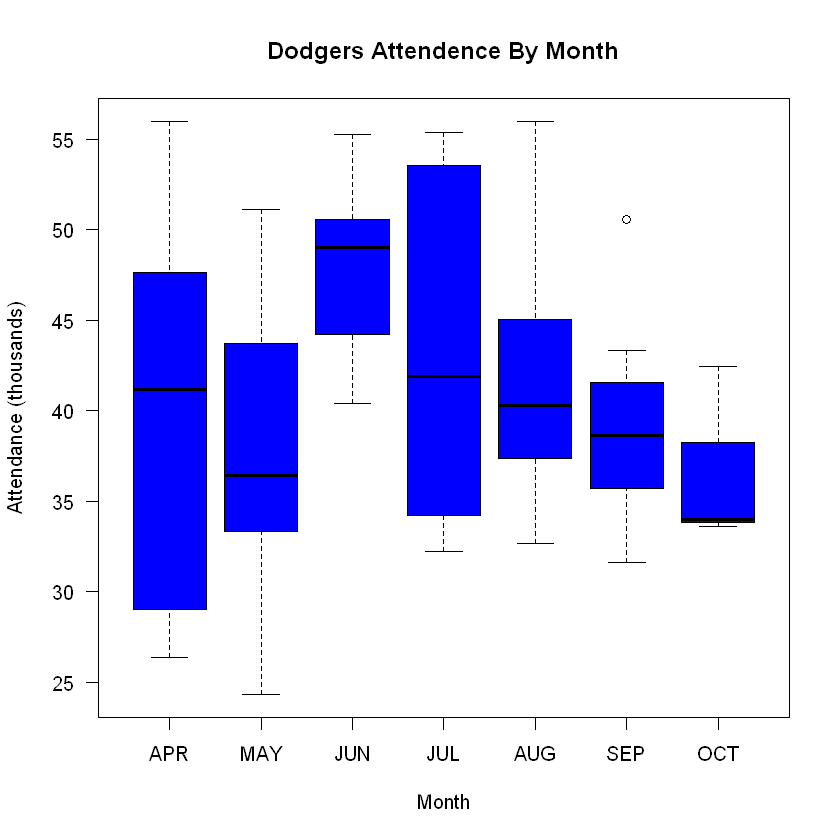

In [73]:
## Box plot to explore attendance by Month
plot(DodgersData$month, DodgersData$attend / 1000, main = "Dodgers Attendence By Month", xlab = "Month", 
ylab = "Attendance (thousands)", col = "blue", las = 1)


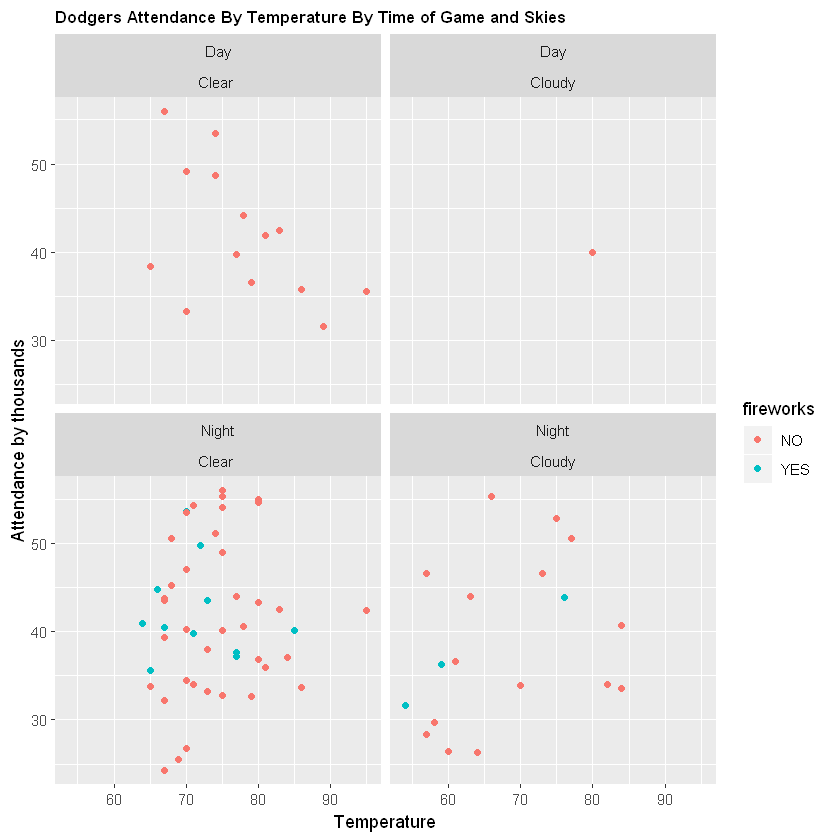

In [91]:
#Evaluate attendance by weather
ggplot(DodgersData, aes(x=temp, y=attend/1000, color=fireworks)) + 
        geom_point() + 
        facet_wrap(day_night~skies) + 
        ggtitle("Dodgers Attendance By Temperature By Time of Game and Skies") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Temperature") +
        ylab("Attendance by thousands")

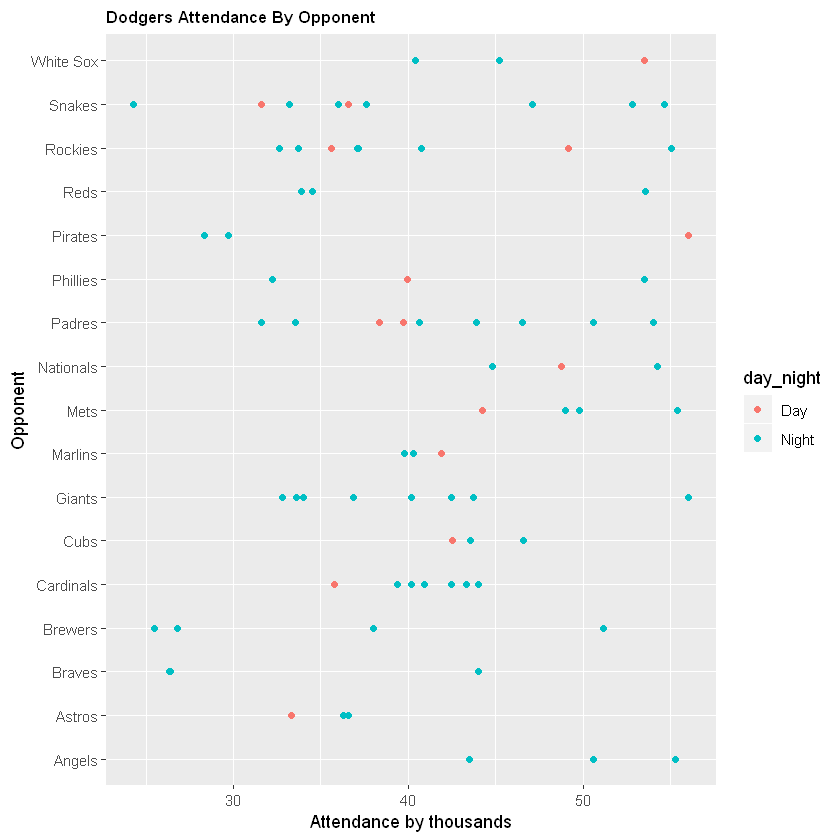

In [92]:
#Plot of Attendance by opponent or visiting team
ggplot(DodgersData, aes(x=attend/1000, y=opponent, color=day_night)) + 
        geom_point() + 
        ggtitle("Dodgers Attendance By Opponent") +
        theme(plot.title = element_text(lineheight=3, face="bold", color="black", size=10)) +
        xlab("Attendance by thousands") +
        ylab("Opponent")

In [80]:
# Create a model with the bobblehead variable entered last
my.model <- {attend ~ month + day_of_week + bobblehead}

# Prepare a Training and Test dataset

# Reseed for repeatability
set.seed(1234)

training_test <- c(rep(1, trunc((2/3)*nrow(DodgersData))), rep(2, trunc((1/3)*nrow(DodgersData))))

# sample(training_test)

# Create a variable in DodgersData data frame to identify Test and Training row
DodgersData$Training_Test <- sample(training_test)

DodgersData$Training_Test <- factor(DodgersData$Training_Test, levels = c(1, 2), labels = c("TRAIN", "TEST"))


DodgersData.Train <- subset(DodgersData, Training_Test == "TRAIN")
DodgersData.Test <- subset(DodgersData, Training_Test == "TEST")



In [81]:
# Fit model to training set
train.model.fit <- lm(my.model, data = DodgersData.Train)

# Predict from Training Set
DodgersData.Train$Predict_Attend <- predict(train.model.fit)

# Evaluate The Fitted Model on the Test Set
DodgersData.Test$Predict_Attend <- predict(train.model.fit, newdata = DodgersData.Test)

#round(cor(DodgersData.Test$attend, DodgersData.Test$Predict_Attend)^2, digits=3)

# compute the proportion of response variance accounted for when predicting Test Data
cat("\n","Proportion of Test Set Variance Accounted for: ", round(cor(DodgersData.Test$attend, DodgersData.Test$Predict_Attend)^2, digits=3), "\n", sep="")


Proportion of Test Set Variance Accounted for: 0.383


In [83]:
# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors
my.model.fit <- lm(my.model, data = DodgersData)  # use all available data
print(summary(my.model.fit))


Call:
lm(formula = my.model, data = DodgersData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10786.5  -3628.1   -516.1   2230.2  14351.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          33909.16    2521.81  13.446  < 2e-16 ***
monthMAY             -2385.62    2291.22  -1.041  0.30152    
monthJUN              7163.23    2732.72   2.621  0.01083 *  
monthJUL              2849.83    2578.60   1.105  0.27303    
monthAUG              2377.92    2402.91   0.990  0.32593    
monthSEP                29.03    2521.25   0.012  0.99085    
monthOCT              -662.67    4046.45  -0.164  0.87041    
day_of_weekTuesday    7911.49    2702.21   2.928  0.00466 ** 
day_of_weekWednesday  2460.02    2514.03   0.979  0.33134    
day_of_weekThursday    775.36    3486.15   0.222  0.82467    
day_of_weekFriday     4883.82    2504.65   1.950  0.05537 .  
day_of_weekSaturday   6372.06    2552.08   2.497  0.01500 *  
day_of_weekSunday     672

 Estimated Effect of Bobblehead Promotion on Attendance: 10715

In [87]:
# hence,From the stats above we see that there is a positive impact on bobblehead promotions on attendance with a potential increase in attendance by 10,715 fans per game.
# and it also indicates that sunday is the best night for promotions. June is best for marketing promotions.

In [97]:
# now i am finding the max value of attendence for marketing promotion.
which.max(DodgersData$attend)

[1] 1

In [ ]:
"""
It displays aarray [1], it means heighest value is in first index
Max value=56000
Based on the available value we can conclude that
day=10,month=1(january) and day_of_week is 6
Hence, the actual data of maximum attendence to watch game is firday january 10.
If we do marketing promotion on that day we might get more attendence in the futuer.
"""